# Intro to Algorithmic Trading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

In [2]:
# Create a list with closing prices for 10 days
fntk_data = [30.05, 30.36, 30.22, 30.52, 30.45, 31.85, 30.47, 30.60, 30.21, 31.30]

In [3]:
# Create a Pandas DataFrame containing closing prices for stock FNTK
fntk_df = pd.DataFrame(
    {"close": fntk_data}
)

# Review the DataFrame
fntk_df

,close
0,30.05
1,30.36
2,30.22
3,30.52
4,30.45
5,31.85
6,30.47
7,30.60
8,30.21
9,31.30


In [4]:
# Set the index as datetime objects starting from 2019-09-09, but only for business days
fntk_df.index = pd.bdate_range(start="2019-09-09", periods=10)

# Review the DataFrame
fntk_df

,close
2019-09-09,30.05
2019-09-10,30.36
2019-09-11,30.22
2019-09-12,30.52
2019-09-13,30.45
2019-09-16,31.85
2019-09-17,30.47
2019-09-18,30.60
2019-09-19,30.21
2019-09-20,31.30


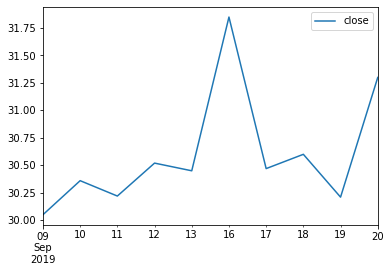

In [5]:
# Use the plot function to plot the closing prices for FNTK
fntk_df.plot()

In [6]:
# Add the trade_type column to track buys and sells
fntk_df["trade_type"] = np.nan

In [7]:
# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_price = 0

In [8]:
# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in fntk_df.iterrows():

    # buy if the previous_price is 0, in other words, buy on the first day
    if previous_price == 0:
        fntk_df.loc[index, "trade_type"] = "buy"

    # buy if the current day's price is less than the previous day's price
    elif row["close"] < previous_price:
        fntk_df.loc[index, "trade_type"] = "buy"

    # sell if the current day's price is greater than the previous day's price
    elif row["close"] > previous_price:
        fntk_df.loc[index, "trade_type"] = "sell"

    # hold if the current day's price is equal to the previous day's price
    else:
        fntk_df.loc[index, "trade_type"] = "hold"

    # update the previous_price to the current row's price
    previous_price = row["close"]

    # if the index is the last index of the DataFrame, sell
    if index == fntk_df.index[-1]:
        fntk_df.loc[index, "trade_type"] = "sell"

In [9]:
# Review the DataFrame
fntk_df

,close,trade_type
2019-09-09,30.05,buy
2019-09-10,30.36,sell
2019-09-11,30.22,buy
2019-09-12,30.52,sell
2019-09-13,30.45,buy
2019-09-16,31.85,sell
2019-09-17,30.47,buy
2019-09-18,30.60,sell
2019-09-19,30.21,buy
2019-09-20,31.30,sell
